1. Import libraries and data
2. Consider security implications that may exist 
3. Create a regional segmentation of data
4. Create an exclusion flag for low activity customers and exclude
5. Create a profiling variabe based on age, income, certain goods in the 'department_id' column (vegan status), and number of dependents
6. Aggregate the max, mean, and min variables for usage frequency and expenditure.
7. Visualizations to show the distribution of profiles.
8. Compare customer profile with regions and departments.

In [1]:
#1 Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/mdiaz/Desktop/CF/Project 4 Instacart Python/Data/Org'

In [9]:
#import new version with customer data set
df = pd.read_pickle(os.path.join(path,'Prepared Data 4.9','df_merged_final.pkl'))

In [10]:
# To drop unneeded _merge column
df.drop(columns={'_merge'},inplace=True)

#2 Check Security Implications - The PII such as first and last name are visible. 

In [11]:
# checking data output
df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,no_of_dependents,marital_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


#3 Create a regional segmentation of the data. Q) Determine whether there is a difference in spending habits between the different US regions. A) The difference in low vs high spenders is about the same across all regions. 

In [12]:
# defining regions 
northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
south=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
west=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [13]:
# creating an empty list and for loop logic
result=[]

for value in df['state']:
    if value in northeast:
        result.append('Northeast')
    elif value in midwest:
        result.append('Midwest')
    elif value in south:
        result.append('South')
    elif value in west:
        result.append('West')

In [15]:
# Creating the region column based on the for loop results
df['regions']=result

In [16]:
# Checking value counts in the regions column
df['regions'].value_counts()

South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: regions, dtype: int64

In [17]:
# Checking that the regions column is the same length as the rest of the data frame
len(df['regions'])

32434212

In [18]:
df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,no_of_dependents,marital_status,income,regions
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


In [19]:
# Creating a crosstab to determine difference in spending power across regions
crosstab=pd.crosstab(df['regions'],df['spending_flag'],dropna=False)

In [20]:
crosstab.to_clipboard()

In [21]:
crosstab

spending_flag,High spender,Low spender
regions,,
Midwest,156129,7447681
Northeast,108343,5620004
South,210182,10591428
West,160807,8139638


#4 Create an exclusion flag for low activity customers and exclude

In [22]:
# Creating an activity flag based on max_order
df.loc[df['max_order']>=5,'activity']='normal'
df.loc[df['max_order']<5,'activity']='low'

In [23]:
# Checking the value counts in the activity flag column
df['activity'].value_counts()

normal    30992664
low        1441548
Name: activity, dtype: int64

In [24]:
# Checking that the length of the activity column matches the dataframe
len(df['activity'])

32434212

In [25]:
# To create a dataframe containing only low activity customers
df_low=df[df['activity']=='low']

In [26]:
df_low.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,last_name,gender,state,age,date_joined,no_of_dependents,marital_status,income,regions,activity
1513,520620,120,prior,1,3,11,NaN,196,2,0,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low
1514,3273029,120,prior,3,2,8,19.0,196,2,1,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low
1515,520620,120,prior,1,3,11,NaN,46149,1,0,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low
1516,3273029,120,prior,3,2,8,19.0,46149,1,1,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low
1517,520620,120,prior,1,3,11,NaN,26348,3,0,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low


In [27]:
df_low.shape

(1441548, 35)

In [29]:
# Exporting low activity sample as a pkl file
df_low.to_pickle(os.path.join(path,'Prepared Data 4.10','low_activity_user_data.pkl'))

In [30]:
# Creating a dataframe with only normal activity customers
df2=df[df['activity']=='normal']

In [31]:
df2.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,last_name,gender,state,age,date_joined,no_of_dependents,marital_status,income,regions,activity
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal


In [32]:
df2.shape

(30992664, 35)

#5 Creating a profiling variables 

In [33]:
df2.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_order_frequency',
       'order_frequency_flag', 'first_name', 'last_name', 'gender', 'state',
       'age', 'date_joined', 'no_of_dependents', 'marital_status', 'income',
       'regions', 'activity'],
      dtype='object')

In [36]:
#Family Status

# Creating a family status flag to find parents of young children, parents of older children, and people with no children
# Department id # 18 is designated 'babies' and will be used here to identify families with young children
df2.loc[(df['department_id']==18)&(df['no_of_dependents']>0),'family_status']='family with young children'
df2.loc[(df['department_id']!=18)&(df['no_of_dependents']>0),'family_status']='family with older children'
df2.loc[df['no_of_dependents']==0,'family_status']='no children'

In [37]:
df2['family_status'].value_counts()

family with older children    22938568
no children                    7747032
family with young children      307064
Name: family_status, dtype: int64

In [38]:
len(df2['family_status'])

30992664

In [39]:
len(df2)

30992664

In [40]:
#Vegan Status 

# Creating logic for a vegan flag
# Department numbers 12, 16 and 20 are meat and seafood, dairy and eggs, and deli respectively and are not vegan
result=[]

for value in df2['department_id']:
    if value in (12,16,20):
        result.append('not vegan')
    else:
        result.append('vegan')

In [50]:
df2['vegan_status']=result

/var/folders/dp/hgd07ff102g9k5vqs2psn8_40000gn/T/ipykernel_2269/2869749955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['vegan_status']=result


In [43]:
len(df2['vegan_status'])

30992664

In [44]:
df2['vegan_status'].value_counts()

vegan        24122217
not vegan     6870447
Name: vegan_status, dtype: int64

In [49]:
#Age Categories

# To create a column grouping age into categories
df2.loc[(df2['age']>=18)&(df2['age']<=29),'age_category']='college age'
df2.loc[(df2['age']>=30)&(df2['age']<=39),'age_category']='young adult'
df2.loc[(df2['age']>=40)&(df2['age']<=49),'age_category']='middle age adult'
df2.loc[(df2['age']>=50)&(df2['age']<=59),'age_category']='late career adult'
df2.loc[df2['age']>60,'age_category']='senior'

In [47]:
len(df2['age_category'])

30992664

In [48]:
df2['age_category'].value_counts()

senior               10121613
college age           5823021
middle age adult      4887575
young adult           4851629
late career adult     4846498
Name: age_category, dtype: int64

#6 Aggregating and Grouping

In [61]:
# Creating a min_useage_frequency column based on days_since_prior_order
# Outputs displayed in _useage_frequency_columns are the most days the customer has gone since their last instacart order
df2['min_usage_frequency']=df2.groupby(['user_id'])['days_since_prior_order'].transform(np.max)

/var/folders/dp/hgd07ff102g9k5vqs2psn8_40000gn/T/ipykernel_2269/3211801858.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['min_usage_frequency']=df2.groupby(['user_id'])['days_since_prior_order'].transform(np.max)


In [1]:
# To change the data type to one which will take up less memory space
df2['min_usage_frequency']=df2['min_usage_frequency'].astype('int32') 

NameError: name 'df2' is not defined

In [63]:
# To check the length of the output
len(df2['min_usage_frequency'])

30992664

In [64]:
df2['max_usage_frequency']=df2.groupby(['user_id'])['days_since_prior_order'].transform(np.min)

/var/folders/dp/hgd07ff102g9k5vqs2psn8_40000gn/T/ipykernel_2269/461113080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['max_usage_frequency']=df2.groupby(['user_id'])['days_since_prior_order'].transform(np.min)


In [65]:
df2['max_usage_frequency']=df2['max_usage_frequency'].astype('int32')

/var/folders/dp/hgd07ff102g9k5vqs2psn8_40000gn/T/ipykernel_2269/1068895488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['max_usage_frequency']=df2['max_usage_frequency'].astype('int32')


In [66]:
df2['max_usage_frequency']=df2.groupby(['user_id'])['days_since_prior_order'].transform(np.min)

/var/folders/dp/hgd07ff102g9k5vqs2psn8_40000gn/T/ipykernel_2269/461113080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['max_usage_frequency']=df2.groupby(['user_id'])['days_since_prior_order'].transform(np.min)


In [67]:
df2['max_usage_frequency']=df2['max_usage_frequency'].astype('int32') 

/var/folders/dp/hgd07ff102g9k5vqs2psn8_40000gn/T/ipykernel_2269/3102741312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['max_usage_frequency']=df2['max_usage_frequency'].astype('int32')


In [68]:
len(df2['max_usage_frequency'])

30992664

In [69]:
df2['average_usage_frequency']=df2.groupby(['user_id'])['days_since_prior_order'].transform(np.mean)

/var/folders/dp/hgd07ff102g9k5vqs2psn8_40000gn/T/ipykernel_2269/2260905509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['average_usage_frequency']=df2.groupby(['user_id'])['days_since_prior_order'].transform(np.mean)


In [70]:
df2['average_usage_frequency']=df2['average_usage_frequency'].astype('int32')

/var/folders/dp/hgd07ff102g9k5vqs2psn8_40000gn/T/ipykernel_2269/1259258902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['average_usage_frequency']=df2['average_usage_frequency'].astype('int32')


In [71]:
len(df2['average_usage_frequency'])

30992664

In [72]:
df2.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,marital_status,income,regions,activity,family_status,vegan_status,age_category,min_usage_frequency,max_usage_frequency,average_usage_frequency
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,married,40423,South,normal,family with older children,vegan,young adult,30,0,20
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,married,40423,South,normal,family with older children,vegan,young adult,30,0,20
2,473747,1,prior,3,3,12,21.0,196,1,1,...,married,40423,South,normal,family with older children,vegan,young adult,30,0,20
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,married,40423,South,normal,family with older children,vegan,young adult,30,0,20
4,431534,1,prior,5,4,15,28.0,196,1,1,...,married,40423,South,normal,family with older children,vegan,young adult,30,0,20


In [73]:
# Creating customer expenditure aggregation variables and check the length of each new column
df2['max_expenditure']=df2.groupby(['user_id'])['prices'].transform(np.max)

/var/folders/dp/hgd07ff102g9k5vqs2psn8_40000gn/T/ipykernel_2269/4002367040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['max_expenditure']=df2.groupby(['user_id'])['prices'].transform(np.max)


In [74]:
# To change the data type to one which will take up less memory space
df2['max_expenditure']=df2['max_expenditure'].astype('int32')

/var/folders/dp/hgd07ff102g9k5vqs2psn8_40000gn/T/ipykernel_2269/3845791414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['max_expenditure']=df2['max_expenditure'].astype('int32')


In [75]:
len(df2['max_expenditure'])

30992664

In [76]:
df2['min_expenditure']=df2.groupby(['user_id'])['prices'].transform(np.min)

/var/folders/dp/hgd07ff102g9k5vqs2psn8_40000gn/T/ipykernel_2269/60051554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['min_expenditure']=df2.groupby(['user_id'])['prices'].transform(np.min)


In [77]:
df2['min_expenditure']=df2['min_expenditure'].astype('int32')

/var/folders/dp/hgd07ff102g9k5vqs2psn8_40000gn/T/ipykernel_2269/474183579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['min_expenditure']=df2['min_expenditure'].astype('int32')


In [78]:
len(df2['min_expenditure'])

30992664

In [79]:
df2['avg_expenditure']=df2.groupby(['user_id'])['prices'].transform(np.mean)

/var/folders/dp/hgd07ff102g9k5vqs2psn8_40000gn/T/ipykernel_2269/1376841998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['avg_expenditure']=df2.groupby(['user_id'])['prices'].transform(np.mean)


In [80]:
df2['avg_expenditure']=df2['avg_expenditure'].astype('int32')

/var/folders/dp/hgd07ff102g9k5vqs2psn8_40000gn/T/ipykernel_2269/3032774477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['avg_expenditure']=df2['avg_expenditure'].astype('int32')


In [81]:
len(df2['avg_expenditure'])

30992664

In [82]:
df2.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,activity,family_status,vegan_status,age_category,min_usage_frequency,max_usage_frequency,average_usage_frequency,max_expenditure,min_expenditure,avg_expenditure
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,normal,family with older children,vegan,young adult,30,0,20,14,1,6
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,normal,family with older children,vegan,young adult,30,0,20,14,1,6
2,473747,1,prior,3,3,12,21.0,196,1,1,...,normal,family with older children,vegan,young adult,30,0,20,14,1,6
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,normal,family with older children,vegan,young adult,30,0,20,14,1,6
4,431534,1,prior,5,4,15,28.0,196,1,1,...,normal,family with older children,vegan,young adult,30,0,20,14,1,6


#7 VISUALS

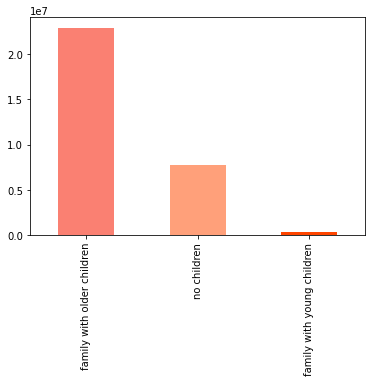

In [95]:
# BAR CHART FOR FAMILY STATUS
fam_status_bar=df2['family_status'].value_counts().plot.bar(color=['salmon','lightsalmon','orangered'])

#Analysis - Families with older children are most likely to purchase from instacart by almost double as those with no children. It's surprising that the families with young children don't subscribe to service, considering how much time small children require. 

In [5]:
# Saving the fam_status_bar chart as a PNG
fam_status_bar.figure.savefig(os.path.join(path,'Analysis','Visualizations 4.10','fam_status_bar.png'))

NameError: name 'fam_status_bar' is not defined

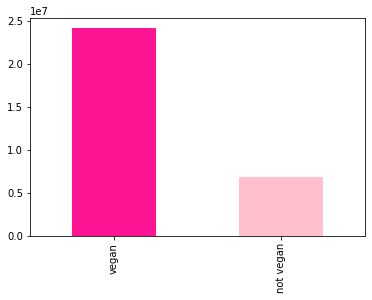

In [94]:
# BAR CHART FOR VEGAN PRODUCT
veg_status_bar=df2['vegan_status'].value_counts().plot.bar(color=['deeppink','pink'])

Analysis - Most customers seems to purchase items that are not perishiable like meat, eggs and diary. Seems although the customers are seeking Instacart for dry foods. 

In [89]:
# Saving veg_status_bar chart as a PNG
veg_status_bar.figure.savefig(os.path.join(path,'Analysis','Visualizations','veg_status_bar.png'))

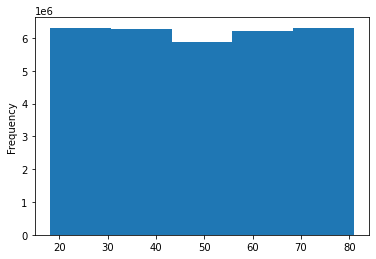

In [90]:
# HISTOGRAM FOR AGE COLUMN
age_hist=df2['age'].plot.hist(bins=5)

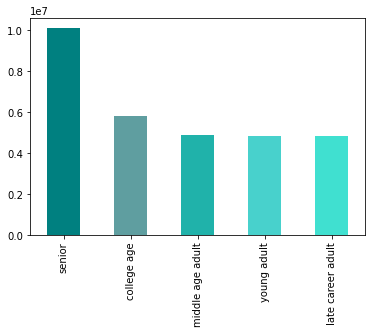

In [93]:
# Creating a bar graph of the age_category column
age_cat_bar=df2['age_category'].value_counts().plot.bar(color=['Teal','cadetblue','lightseagreen','mediumturquoise','turquoise'])

Analysis - Instacart has significant senior customer base, followed by college age, which is about 60% of the customer . Customers that are considered middile age adult, young adult and late career adult each are about half of the customer base as seniors. 

In [96]:
# Saving age_hist as a PNG
age_hist.figure.savefig(os.path.join(path,'Analysis','Visualizations','age_hist.png'))

In [97]:
# Saving age_cat_bar as a PNG
age_cat_bar.figure.savefig(os.path.join(path,'Analysis','Visualizations','age_category_bar.png'))

#8 Compare customer profile with regions and departments

In [98]:
# To crosstuabulate customer family status by region
crosstab_fam_status=pd.crosstab(df2['regions'],df2['family_status'],dropna=False)

In [99]:
crosstab_fam_status

family_status,family with older children,family with young children,no children
regions,,,
Midwest,5372187,71033,1824487
Northeast,4059553,54687,1355828
South,7631879,104231,2584352
West,5874949,77113,1982365


In [100]:
crosstab_fam_status.to_clipboard()

In [101]:
# To crosstabulate vegan status by region
crosstab_veg_status=pd.crosstab(df2['regions'],df2['vegan_status'],dropna=False)

In [102]:
crosstab_veg_status

vegan_status,not vegan,vegan
regions,,
Midwest,1608546,5659161
Northeast,1214263,4255805
South,2285565,8034897
West,1762073,6172354


In [103]:
crosstab_veg_status.to_clipboard()

In [104]:
crosstab_age_category=pd.crosstab(df2['regions'],df2['age_category'],dropna=False)

In [105]:
crosstab_age_category

age_category,college age,late career adult,middle age adult,senior,young adult
regions,,,,,
Midwest,1356946,1149210,1175882,2358596,1128320
Northeast,1025132,850120,860342,1810761,848422
South,1962570,1582024,1602389,3364234,1648895
West,1478373,1265144,1248962,2588022,1225992


In [106]:
crosstab_age_category.to_clipboard()

In [107]:
df2.shape

(30992664, 44)

In [108]:
# Counting values of family_status
df2['family_status'].value_counts()

family with older children    22938568
no children                    7747032
family with young children      307064
Name: family_status, dtype: int64

In [109]:
# Aggregating average amount spent by each family status category
df2.groupby('family_status')['avg_expenditure'].mean()

family_status
family with older children    11.394738
family with young children    10.069643
no children                   11.602518
Name: avg_expenditure, dtype: float64

In [110]:
# Aggregating average amount spent by age category
df2.groupby('age_category')['avg_expenditure'].mean()

age_category
college age          11.693860
late career adult    11.277543
middle age adult     11.775708
senior               11.306990
young adult          11.385032
Name: avg_expenditure, dtype: float64

In [111]:
# Aggregating the average amount spent by vegan status
df2.groupby('vegan_status')['avg_expenditure'].mean()

vegan_status
not vegan    11.740676
vegan        11.346071
Name: avg_expenditure, dtype: float64

#EXPORTING

In [112]:
df2.to_pickle(os.path.join(path,'Prepared Data 4.10','final_dataset.pkl'))